# PL01. EDA del Conjunto de Datos _Pingüinos de Palmer_

__Borja González Seoane. Aprendizaje Automático. Curso 2024-25__

En el Campus Virtual encontrará un archivo CSV con el conjunto de datos _Pingüinos de Palmer_: `palmer_penguins.csv`. Este conjunto de datos contiene información sobre pingüinos de varias especies diferentes. En este ejercicio, se le pide que realice un análisis exploratorio de los datos (EDA) sobre este conjunto de datos dado. Considere que usted es un científico de datos al que le han proporcionado este conjunto de datos para que plantee diferentes casos de uso y desarrolle modelos predictivos interesantes para un equipo de investigación de biología marina.

Siéntase con libertad para realizar cualquier tipo de análisis que considere relevante. A continuación, se proporcionan algunas sugerencias de análisis que podría realizar:

1. Estrucutra de los datos. Dimensiones del conjunto de datos, tipos de datos, etc.
2. Estadísticas descriptivas. Resumen estadístico de las variables numéricas.
3. Distribución de las variables. Histogramas, diagramas de caja, etc.
4. Relaciones entre variables. Correlaciones, diagramas de dispersión, etc.
5. Análisis de valores perdidos. ¿Cómo manejaría los valores perdidos?
6. Análisis de valores atípicos. ¿Cómo manejaría los valores atípicos?
7. Análisis de la variable objetivo, de haberla. ¿Cómo es la distribución de la variable objetivo?

Para llevar a cabo este análisis, probablemente necesitará preparar algunas visualizaciones de datos. Considere que sus análisis tendrán que ser presentados al equipo, compuesto por personal no técnico, por lo que deberá ser capaz de explicar sus resultados de manera clara y concisa. Algunas librerías de Python que podrían serle útiles para este análisis son `pandas`, `matplotlib`, `seaborn`, etc.


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 0. Carga del conjunto de datos

In [10]:
CSV_FILE = "palmer_penguins.csv"

df = pd.read_csv(CSV_FILE)

## 1. Estructura de los datos

In [19]:
# Información general
print("Dimensiones del dataFrame:", df.shape)
individuos = df.shape[0]
print("Cantidad de individuos:", individuos)

# Datos del dataFrame
print("Encabezado del dataFrame:")
print(df.head())

print("Estadísticas descriptivas:")
print(df.describe())

# Datos faltantes
print("Datos faltantes:")
print(df.isnull().sum())

# Datos duplicados
print("Datos duplicados:")
print(df.duplicated().sum())

# Datos únicos
print("Datos únicos:")
print(df.nunique())


Dimensiones del dataFrame: (344, 9)
Cantidad de individuos: 344
Encabezado del dataFrame:
   id species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0   0  Adelie  Torgersen            39.1           18.7              181.0   
1   1  Adelie  Torgersen            39.5           17.4              186.0   
2   2  Adelie  Torgersen            40.3           18.0              195.0   
3   3  Adelie  Torgersen             NaN            NaN                NaN   
4   4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  
Estadísticas descriptivas:
               id  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count  344.000000      342.000000     342.000000         342.000000   
mean   171.500000       43.921930      17.151170         200.915205   
std     99.4484

## 2. Estadísticas descriptivas

In [12]:
# Especies
species_count = df["species"].nunique()
print("\nCantidad de especies:", species_count)

species = df["species"].unique()
print("Especies:", species)

species_quantity = df["species"].value_counts()
print("Cantidad de individuos por especie:", species_quantity)

species_quantity_percentage = df["species"].value_counts(normalize=True)
print("Porcentaje de individuos por especie:", species_quantity_percentage)

# Islas
island_count = df["island"].nunique()
print("\nCantidad de islas:", island_count)

island = df["island"].unique()
print("Islas:", island)

island_quantity = df["island"].value_counts()
print("Cantidad de individuos por isla:", island_quantity)

island_quantity_percentage = df["island"].value_counts(normalize=True)
print("Porcentaje de individuos por isla:", island_quantity_percentage)

# Sexo
males_quantity = len(df[df["sex"] == "male"])
print("\nCantidad de machos:", males_quantity)

female_quantity = len(df[df["sex"] == "female"])
print("Cantidad de hembras", female_quantity)

group_by_sex_species = df.groupby(["species", "sex"]).size().reset_index(name='counts')
group_by_sex_islands = df.groupby(["island", "sex"]).size().reset_index(name='counts')
group_by_island_species = df.groupby(["species", "island"]).size().reset_index(name='counts')

print("\nCantidad de individuos por sexo y especie:", group_by_sex_species)
print("Cantidad de individuos por sexo e isla:", group_by_sex_islands)
print("Cantidad de individuos por especie e isla:", group_by_island_species)

individuals = len(df)
group_by_sex_species['percentage'] = (group_by_sex_species['counts'] / individuals) * 100
group_by_sex_islands['percentage'] = (group_by_sex_islands['counts'] / individuals) * 100
group_by_island_species['percentage'] = (group_by_island_species['counts'] / individuals) * 100

print("\nPorcentaje de individuos por sexo y especie:", group_by_sex_species)
print("Porcentaje de individuos por sexo e isla:", group_by_sex_islands)
print("Porcentaje de individuos por especie e isla:", group_by_island_species)

group_by_sex_island_and_species = df.groupby(["species", "island", "sex"]).size().reset_index(name='counts')
print("Cantidad de individuos por sexo, especie e isla:", group_by_sex_island_and_species)


Cantidad de especies: 3
Especies: ['Adelie' 'Gentoo' 'Chinstrap']
Cantidad de individuos por especie: species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
Porcentaje de individuos por especie: species
Adelie       0.441860
Gentoo       0.360465
Chinstrap    0.197674
Name: proportion, dtype: float64

Cantidad de islas: 3
Islas: ['Torgersen' 'Biscoe' 'Dream']
Cantidad de individuos por isla: island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
Porcentaje de individuos por isla: island
Biscoe       0.488372
Dream        0.360465
Torgersen    0.151163
Name: proportion, dtype: float64

Cantidad de machos: 168
Cantidad de hembras 165

Cantidad de individuos por sexo y especie:      species     sex  counts
0     Adelie  female      73
1     Adelie    male      73
2  Chinstrap  female      34
3  Chinstrap    male      34
4     Gentoo  female      58
5     Gentoo    male      61
Cantidad de individuos por sexo e isla:       island 

## 3. Distribución de las variables

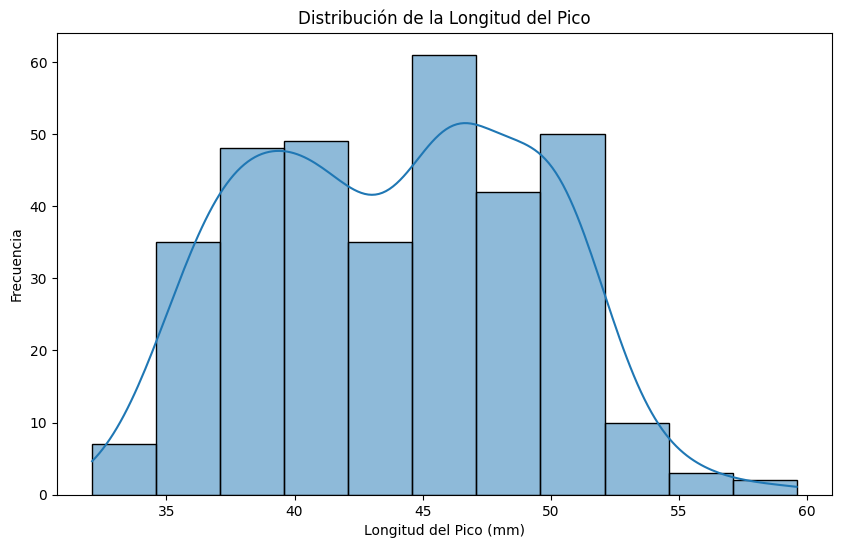

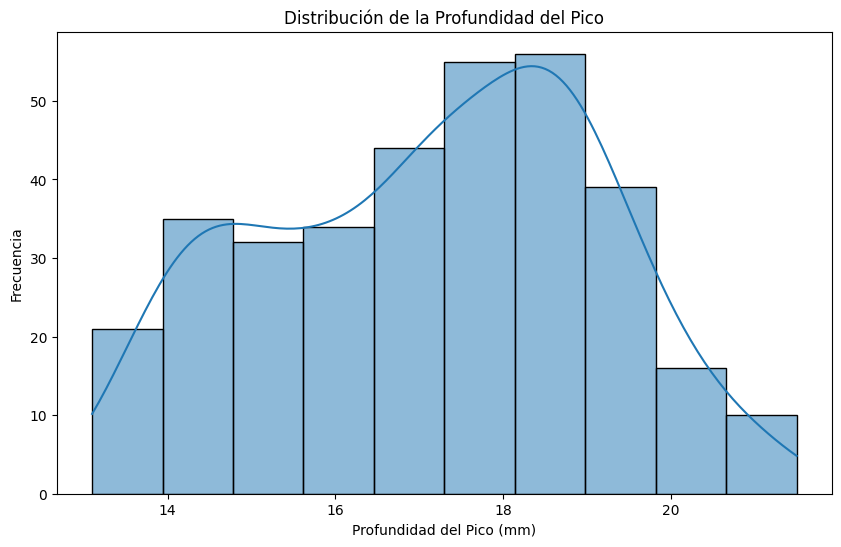

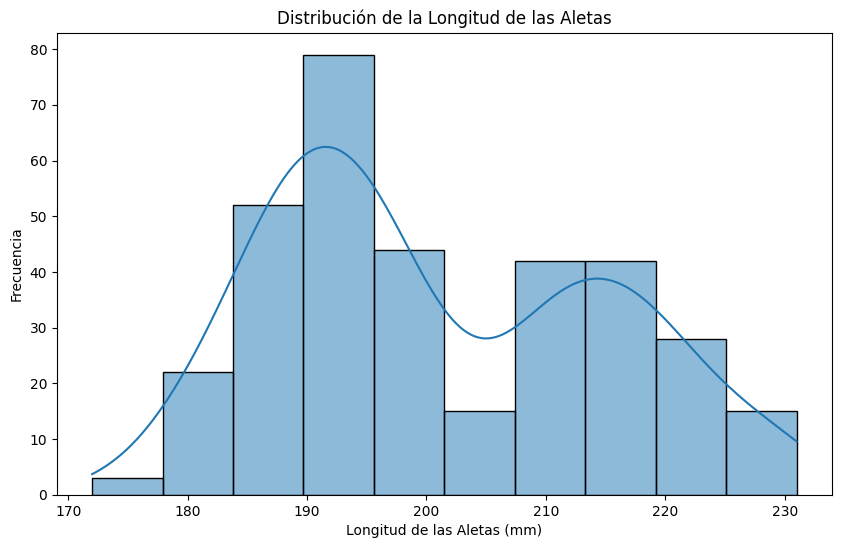

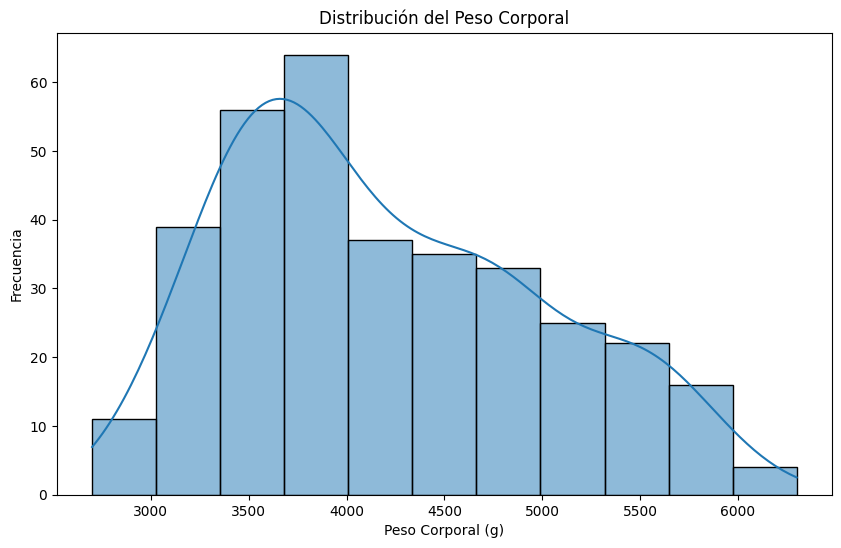

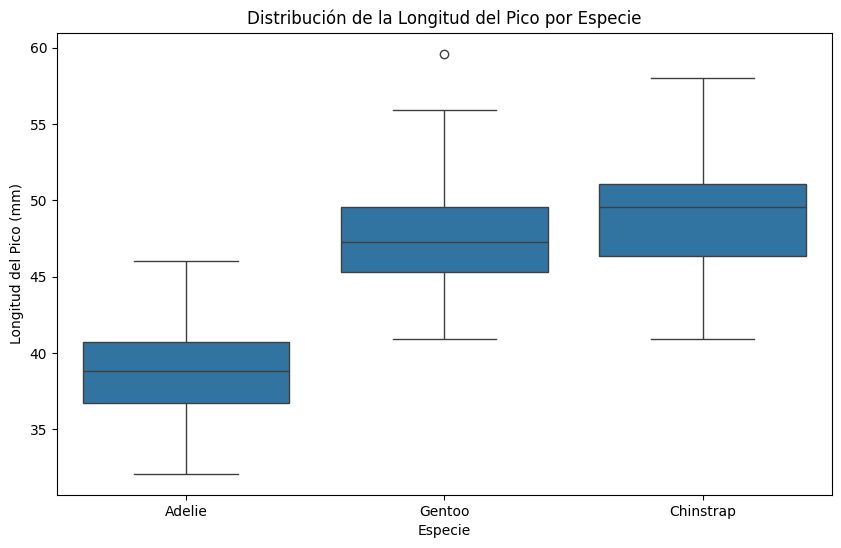

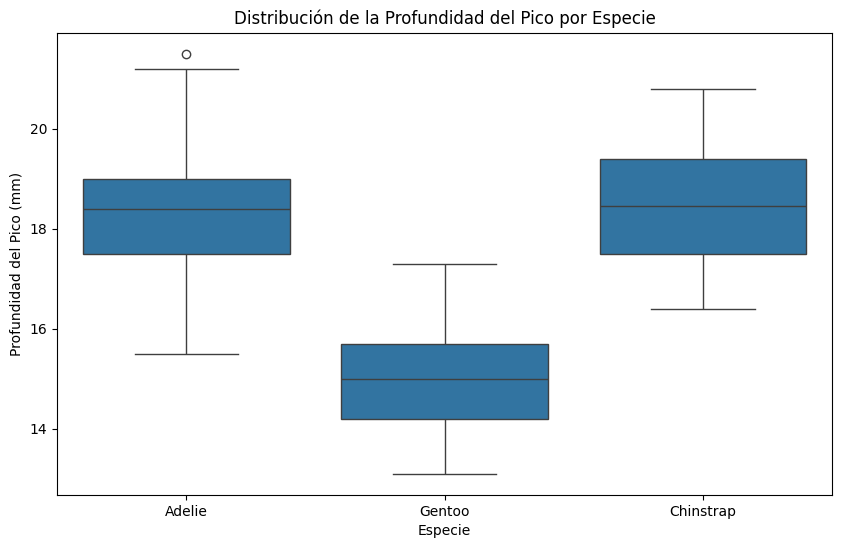

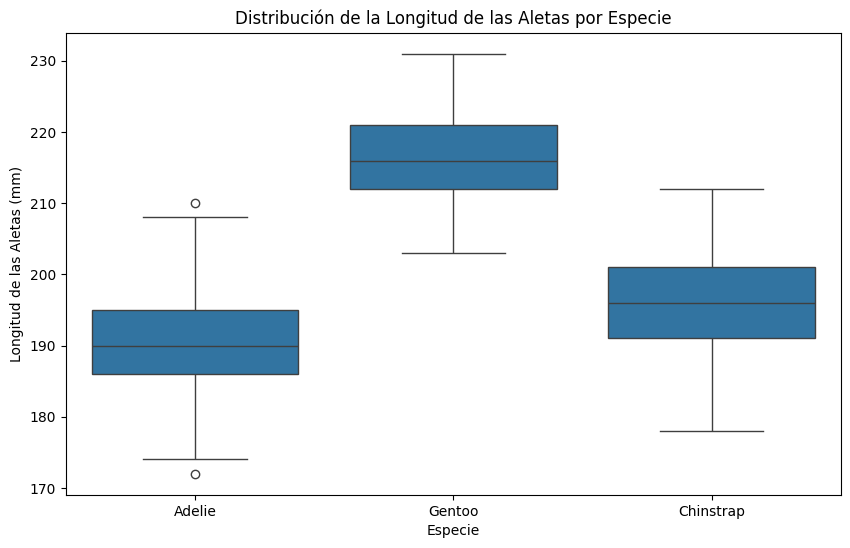

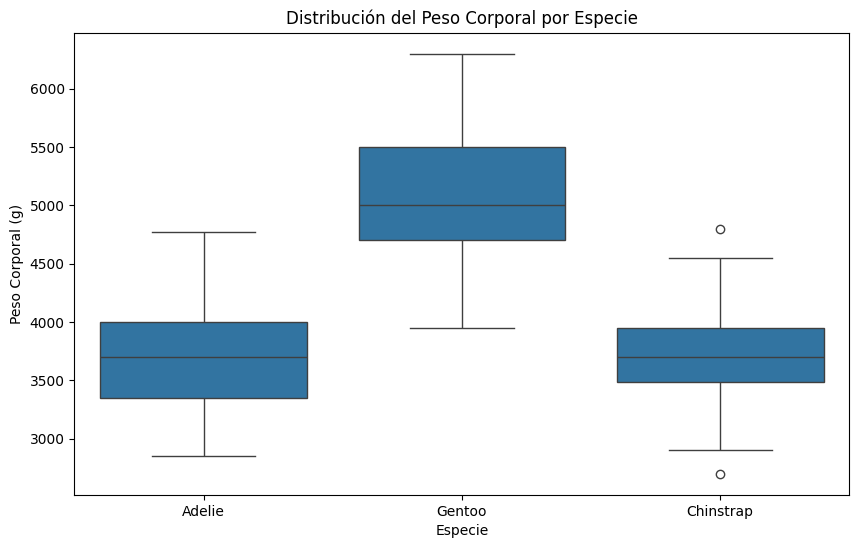

In [13]:
# Histograma de la longitud del pico
plt.figure(figsize=(10, 6))
sns.histplot(df['bill_length_mm'].dropna(), kde=True)
plt.title('Distribución de la Longitud del Pico')
plt.xlabel('Longitud del Pico (mm)')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de la profundidad del pico
plt.figure(figsize=(10, 6))
sns.histplot(df['bill_depth_mm'].dropna(), kde=True)
plt.title('Distribución de la Profundidad del Pico')
plt.xlabel('Profundidad del Pico (mm)')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de la longitud de las aletas
plt.figure(figsize=(10, 6))
sns.histplot(df['flipper_length_mm'].dropna(), kde=True)
plt.title('Distribución de la Longitud de las Aletas')
plt.xlabel('Longitud de las Aletas (mm)')
plt.ylabel('Frecuencia')
plt.show()

# Histograma del peso corporal
plt.figure(figsize=(10, 6))
sns.histplot(df['body_mass_g'].dropna(), kde=True)
plt.title('Distribución del Peso Corporal')
plt.xlabel('Peso Corporal (g)')
plt.ylabel('Frecuencia')
plt.show()

# Diagrama de caja de la longitud del pico por especie
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='bill_length_mm', data=df)
plt.title('Distribución de la Longitud del Pico por Especie')
plt.xlabel('Especie')
plt.ylabel('Longitud del Pico (mm)')
plt.show()

# Diagrama de caja de la profundidad del pico por especie
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='bill_depth_mm', data=df)
plt.title('Distribución de la Profundidad del Pico por Especie')
plt.xlabel('Especie')
plt.ylabel('Profundidad del Pico (mm)')
plt.show()

# Diagrama de caja de la longitud de las aletas por especie
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='flipper_length_mm', data=df)
plt.title('Distribución de la Longitud de las Aletas por Especie')
plt.xlabel('Especie')
plt.ylabel('Longitud de las Aletas (mm)')
plt.show()

# Diagrama de caja del peso corporal por especie
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='body_mass_g', data=df)
plt.title('Distribución del Peso Corporal por Especie')
plt.xlabel('Especie')
plt.ylabel('Peso Corporal (g)')
plt.show()

## 4. Relaciones entre variables

Matriz de correlación:
                         id  bill_length_mm  bill_depth_mm  flipper_length_mm  \
id                 1.000000        0.766039      -0.259563           0.455372   
bill_length_mm     0.766039        1.000000      -0.235053           0.656181   
bill_depth_mm     -0.259563       -0.235053       1.000000          -0.583851   
flipper_length_mm  0.455372        0.656181      -0.583851           1.000000   
body_mass_g        0.275493        0.595110      -0.471916           0.871202   
year               0.339103        0.054545      -0.060354           0.169675   

                   body_mass_g      year  
id                    0.275493  0.339103  
bill_length_mm        0.595110  0.054545  
bill_depth_mm        -0.471916 -0.060354  
flipper_length_mm     0.871202  0.169675  
body_mass_g           1.000000  0.042209  
year                  0.042209  1.000000  


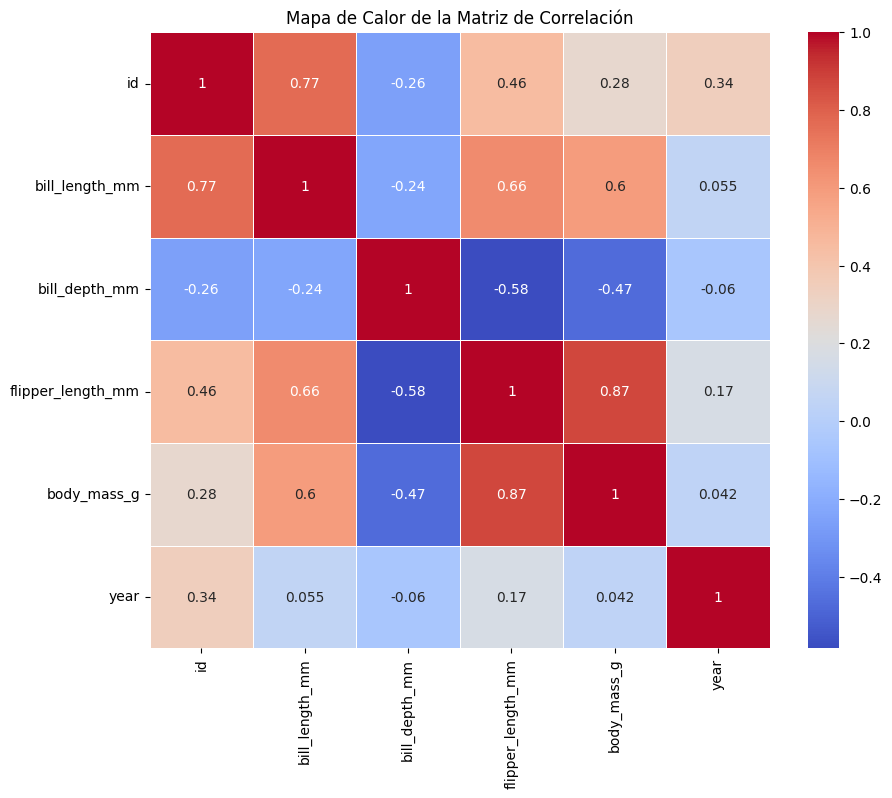

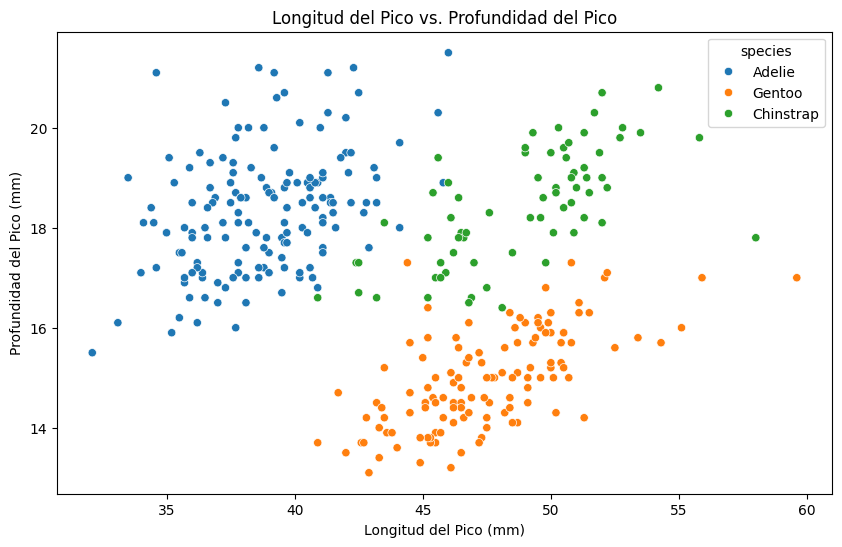

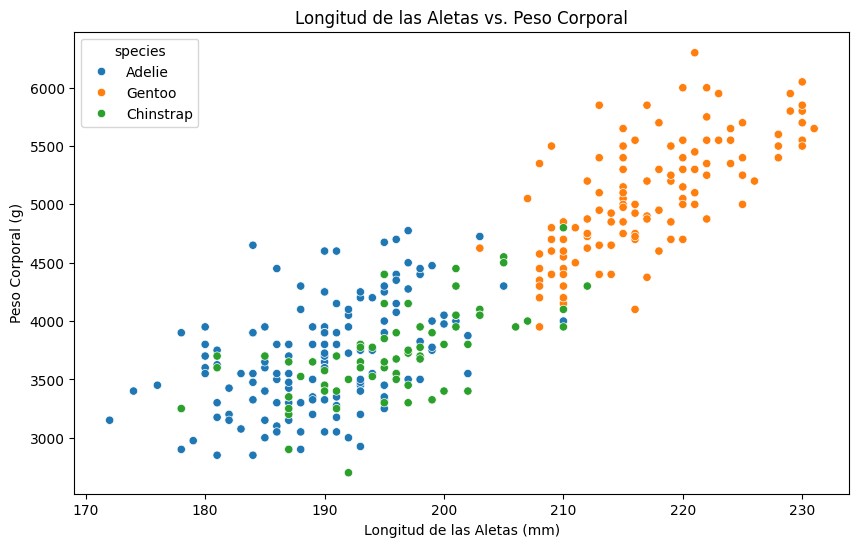

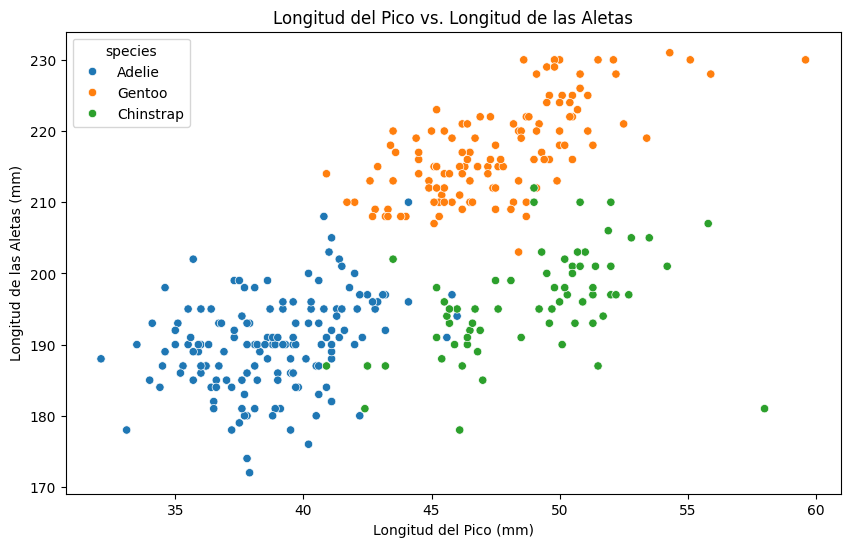

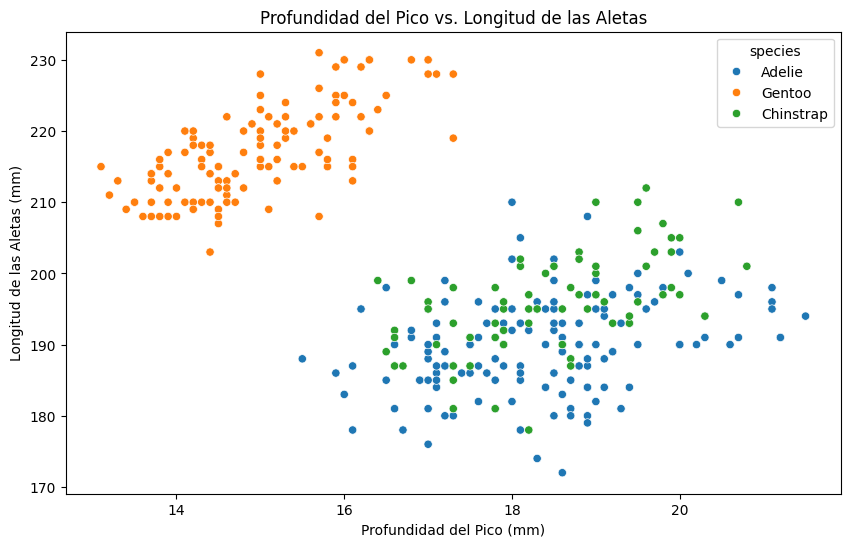

In [14]:
# Selección de solo columnas numéricas
numeric_df = df.select_dtypes(include=['float64', 'int64', np.number])

# Correlación entre variables numéricas
correlation_matrix = numeric_df.corr()
print("Matriz de correlación:")
print(correlation_matrix)

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

# Diagrama de dispersión de la longitud del pico vs. la profundidad del pico
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=df)
plt.title('Longitud del Pico vs. Profundidad del Pico')
plt.xlabel('Longitud del Pico (mm)')
plt.ylabel('Profundidad del Pico (mm)')
plt.show()

# Diagrama de dispersión de la longitud de las aletas vs. el peso corporal
plt.figure(figsize=(10, 6))
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='species', data=df)
plt.title('Longitud de las Aletas vs. Peso Corporal')
plt.xlabel('Longitud de las Aletas (mm)')
plt.ylabel('Peso Corporal (g)')
plt.show()

# Diagrama de dispersión de la longitud del pico vs. la longitud de las aletas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bill_length_mm', y='flipper_length_mm', hue='species', data=df)
plt.title('Longitud del Pico vs. Longitud de las Aletas')
plt.xlabel('Longitud del Pico (mm)')
plt.ylabel('Longitud de las Aletas (mm)')
plt.show()

# Diagrama de dispersión de la profundidad del pico vs. la longitud de las aletas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bill_depth_mm', y='flipper_length_mm', hue='species', data=df)
plt.title('Profundidad del Pico vs. Longitud de las Aletas')
plt.xlabel('Profundidad del Pico (mm)')
plt.ylabel('Longitud de las Aletas (mm)')
plt.show()

## 5. Análisis de valores perdidos

In [15]:
# Identificar valores perdidos
missing_values = df.isnull().sum()
print("Valores perdidos por columna:")
print(missing_values)

# Eliminar filas con valores perdidos
df_dropped = df.dropna()
print("\nDataFrame después de eliminar filas con valores perdidos:")
print(df_dropped.info())

# Rellenar valores perdidos con la media (para columnas numéricas)
df_filled_mean = df.copy()
numeric_columns = df_filled_mean.select_dtypes(include=['float64', 'int64']).columns
df_filled_mean[numeric_columns] = df_filled_mean[numeric_columns].fillna(df_filled_mean[numeric_columns].mean())
print("\nDataFrame después de rellenar valores perdidos con la media:")
print(df_filled_mean.info())

# Rellenar valores perdidos con la moda (para columnas categóricas)
df_filled_mode = df.copy()
categorical_columns = df_filled_mode.select_dtypes(include=['object']).columns
df_filled_mode[categorical_columns] = df_filled_mode[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))
print("\nDataFrame después de rellenar valores perdidos con la moda:")
print(df_filled_mode.info())

Valores perdidos por columna:
id                    0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

DataFrame después de eliminar filas con valores perdidos:
<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 333 non-null    int64  
 1   species            333 non-null    object 
 2   island             333 non-null    object 
 3   bill_length_mm     333 non-null    float64
 4   bill_depth_mm      333 non-null    float64
 5   flipper_length_mm  333 non-null    float64
 6   body_mass_g        333 non-null    float64
 7   sex                333 non-null    object 
 8   year               333 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 2

## 6. Análisis de valores atípicos

In [16]:
# Identificación de valores atípicos usando el método del rango intercuartílico (IQR)
def find_outliers_IQR(df):
    outliers = pd.DataFrame(columns=df.columns)
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_in_column = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers = pd.concat([outliers, outliers_in_column])
    return outliers.drop_duplicates()

outliers = find_outliers_IQR(df)
print("Valores atípicos encontrados:")
print(outliers)

# Manejo de valores atípicos: Eliminación
df_no_outliers = df.copy()
for column in df_no_outliers.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df_no_outliers[column].quantile(0.25)
    Q3 = df_no_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]

print("\nDataFrame después de eliminar valores atípicos:")
print(df_no_outliers.info())

# Manejo de valores atípicos: Sustitución
df_no_outliers = df.copy()
for column in df_no_outliers.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df_no_outliers[column].quantile(0.25)
    Q3 = df_no_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers[column] = np.where(df_no_outliers[column] < lower_bound, lower_bound, df_no_outliers[column])
    df_no_outliers[column] = np.where(df_no_outliers[column] > upper_bound, upper_bound, df_no_outliers[column])

print("\nDataFrame después de sustituir valores atípicos:")
print(df_no_outliers.info())


Valores atípicos encontrados:
Empty DataFrame
Columns: [id, species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex, year]
Index: []

DataFrame después de eliminar valores atípicos:
<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 342 non-null    int64  
 1   species            342 non-null    object 
 2   island             342 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               342 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 26.7+ KB
None

DataFrame después de sustituir valores atípicos:
<class 'pandas.core.frame.DataFrame'>
RangeIn

## 7. Análisis de la variable objetivo

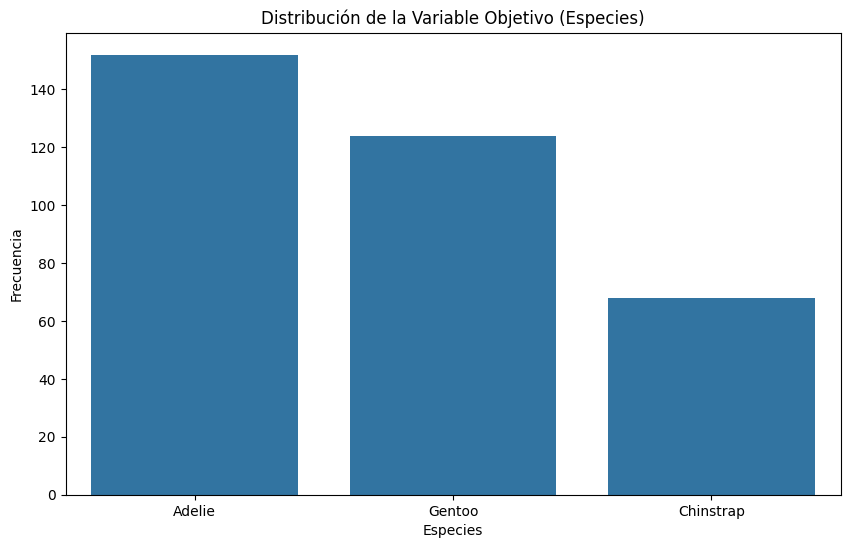

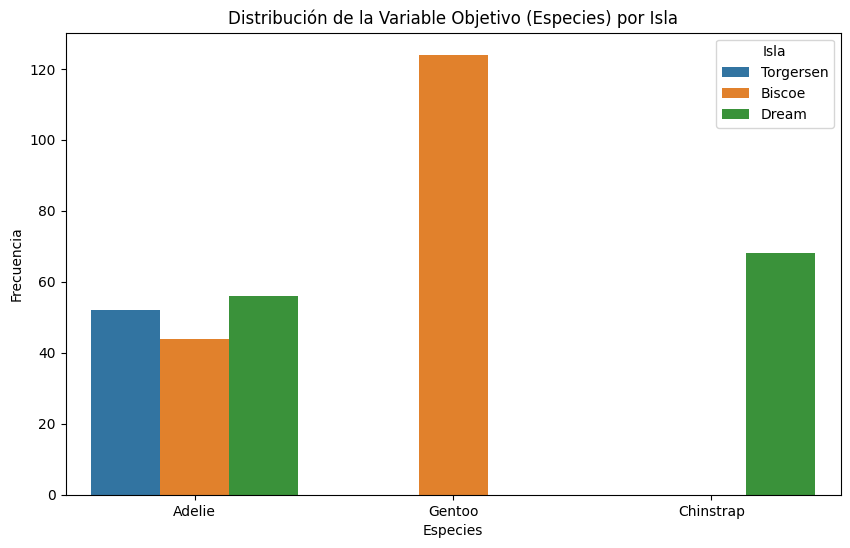

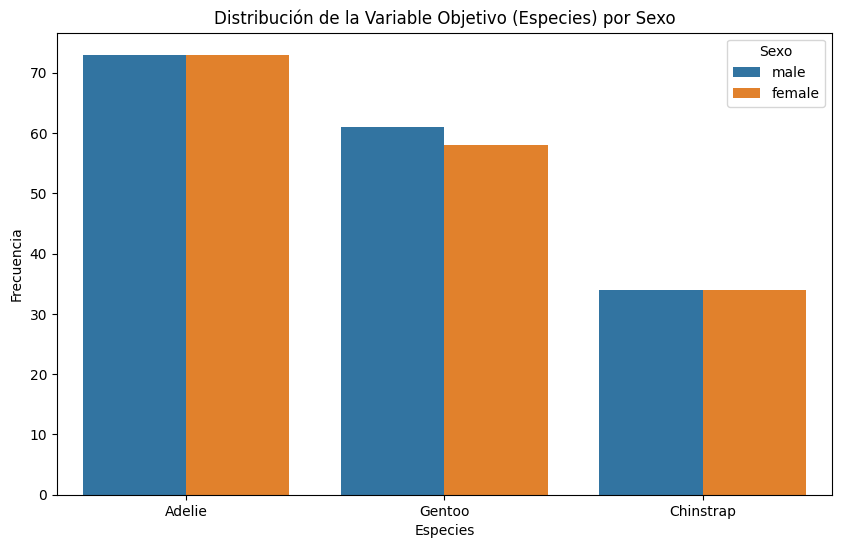

In [17]:
# Asumiendo que la variable objetivo es 'species'
plt.figure(figsize=(10, 6))
sns.countplot(x='species', data=df)
plt.title('Distribución de la Variable Objetivo (Especies)')
plt.xlabel('Especies')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de la variable objetivo por isla
plt.figure(figsize=(10, 6))
sns.countplot(x='species', hue='island', data=df)
plt.title('Distribución de la Variable Objetivo (Especies) por Isla')
plt.xlabel('Especies')
plt.ylabel('Frecuencia')
plt.legend(title='Isla')
plt.show()

# Distribución de la variable objetivo por sexo
plt.figure(figsize=(10, 6))
sns.countplot(x='species', hue='sex', data=df)
plt.title('Distribución de la Variable Objetivo (Especies) por Sexo')
plt.xlabel('Especies')
plt.ylabel('Frecuencia')
plt.legend(title='Sexo')
plt.show()